# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель**

Проанализировать предоставленные данные. Обработать пропуски и аномальные значения. Найти взаимосвязь между отдельными величинами и посмотреть как они влияют друг на друга. Сделать вывод о влиянии различных параметров на цну квартиры.

**Описание данных**

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж


floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

**План работы**

1) Обработать пропуски;
2) Обработать аномальные значения;
3) Обработать дубликаты;
4) Дополнить таблицу необходимыми для анализа параметрами;
5) Найти зависимость цены квартиры от различных параметров;
6) Посмотреть типовые значения различных параметров для продаваемых квартир;
7) Написать общий вывод

### Откройте файл с данными и изучите общую информацию. 

In [7]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

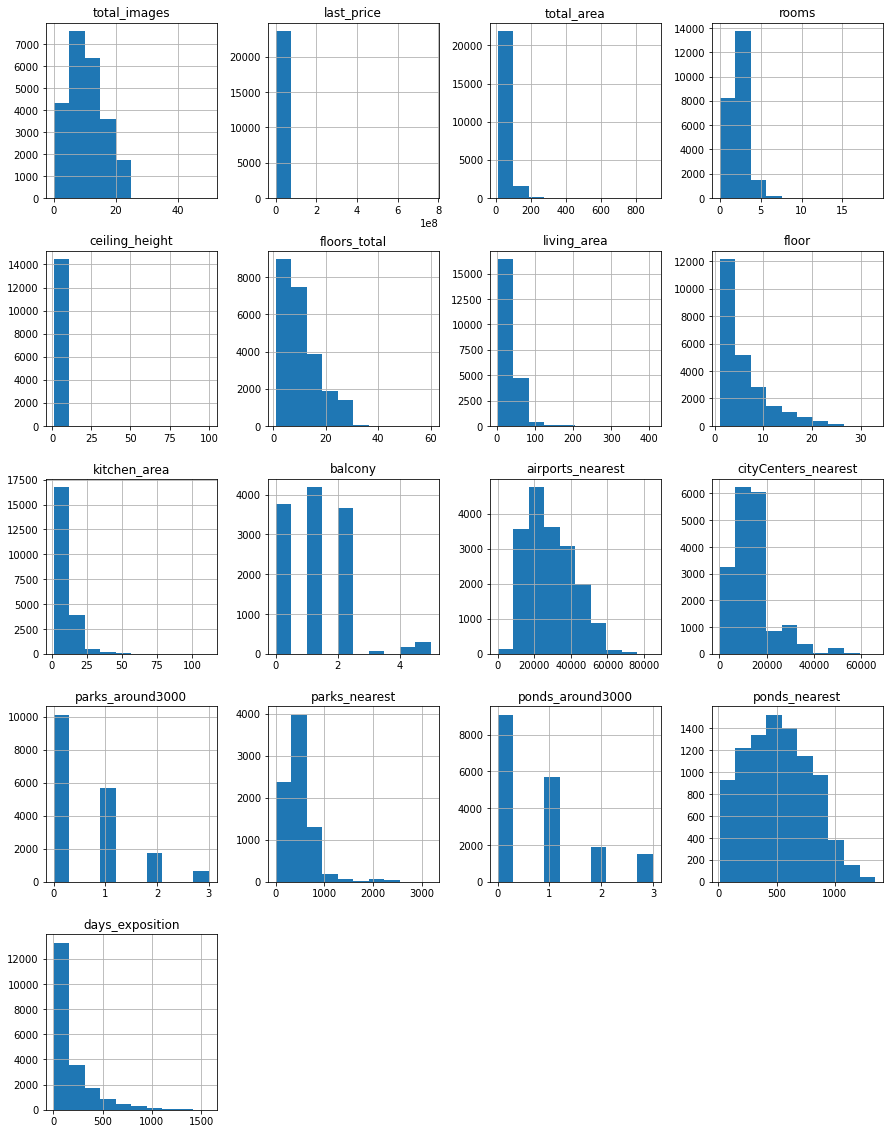

In [8]:
display(data.hist(figsize=(15, 20)))

In [9]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [10]:
data.duplicated().sum()

0

**Вывод**

Исходя из первичного анализа можно сделать вывод о предоставленной таблице. Так, в ней есть 21 столбец и 23699 строк. 

Пропуски присутствуют в столбцах: ceiling_height, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, cityCenters_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.    

Также необходимо изменить тип данных в столбцах first_day_exposition, balcony, floors_total, parks_around3000, ponds_around3000.

Также были был сделан вывод о том, что явные дубликаты в датафрейме отстутсвуют.

Аномальные значения присутствуют в столбце ceiling_height.

### Предобработка данных

In [11]:
data.query('floors_total.isna() and floor.isna()') # проверка есть ли одновременные пропуски в столбцах floors_total и floor

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


**Вывод**

Так как одновременно пропусков в столбцах floor и floors_total нигде нет, при этом так как в столбце floor все значения заполнены, можно предположить, что люди не указывали количество этажей дома, так как они жили на самом верхнем этаже, тогда этаж, на котором они живут и количество этажей в доме одинаково.

In [12]:
data['floors_total'] = data['floors_total'].fillna(data['floor']) #замена значений в floors_total

In [13]:
#нахождение линейных зависимостей между параметрами для заполнения поисков
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.011147,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006993,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075652,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.227227,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028725,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.011147,-0.006993,-0.075652,-0.227227,-0.028725,1.000000,-0.169256,0.678109,0.069522,0.050728,0.163379,0.193770,0.106875,0.019284,-0.252489,0.096972,-0.122960,0.039055,-0.052559
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169256,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678109,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.069522,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050728,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


In [14]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [15]:
#функция, разделяющая квартиры на обычные квартиры, частные дома и коттеджи по количеству комнат в них
def categorize_room(row):
    if row <= 4:
        return 'обычная квартира'
    if 5 <= row <= 10:
        return 'частный дом'
    if row > 10:
        return 'коттедж'

In [16]:
data['room_category'] = data['rooms'].apply(categorize_room) #разделение жилых домов по количеству комнат в них

In [17]:
living_area_typ = data.pivot_table(index='room_category', values='living_area', aggfunc='median')
living_area_typ

,living_area
room_category,
коттедж,201.00
обычная квартира,30.00
частный дом,104.05


In [18]:
#заполнение пропусков в соответствии с категорией квартиры по комнате
data.loc[(data['room_category'] == 'частный дом') & (data['living_area'].isna()), 'living_area'] = 201 
data.loc[(data['room_category'] == 'обычная квартира') & (data['living_area'].isna()), 'living_area'] = 30
data.loc[(data['room_category'] == 'частный дом') & (data['living_area'].isna()), 'living_area'] = 104.5  

**Вывод**

Так как корелляция между числом комнат и жилой площадью равняется 0.84, можно сделать предположение, что эти две величины взаимоувязаны, поэтому пропуски в поле с жилой площадью были заполнены в соответствии с категорией квартиры по количеству комнат.

In [19]:
data['kitchen_area'] = data['kitchen_area'].fillna(0) #замена значений в kitchen_area

**Вывод**

Вероятно, что у некоторых людей кухня объединена с другими комнатами, поэтому в площади кухни они не указали ничего. 

In [20]:
data['balcony'] = data['balcony'].fillna(0) #замена значений balcony 

**Вывод**

Вероятно, что у некоторых людей балкон отсутствует, поэтому в поле с балконом они не указали ничего.

In [21]:
data['floors_total'] = data['floors_total'].astype('int') #изменение типа данных в столбце floors_total
data['balcony'] = data['balcony'].astype('int') #изменение типа данных в столбце balcony

**Вывод**

В столбцах количество этажей и балконов может быть только целое число, а не дробное.

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #изменение типа данных в столбце first_day_exposition

**Вывод**

В столбце с датой публикации о продаже хранятся даты, поэтому следует изменить типа данных в этой колонке.

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [24]:
data['locality_name'] = data['locality_name'].str.replace(r'^(?:посёлок|поселок|деревня|садовое|городской|село)+ ', '', regex=True) #удаление приставок посёлок|поселок|деревня|садовое|городской|село перед населенным пунктом на первом месте
data['locality_name'] = data['locality_name'].str.replace(r'^(?:посёлок|поселок|городского|товарищество)+ ', '', regex=True) #удаление приставок посёлок|поселок|городского|товарищество перед населенным пунктом на втором месте
data['locality_name'] = data['locality_name'].str.replace(r'^ ', '', regex=True) #удаление приставок перед названием населенного пункта

**Вывод**

И того получаем названия населенных пунктов без повторений, так как убраны все приставки, из-за которых может возникнуть путаница.

In [25]:
data[['parks_around3000', 'ponds_around3000']] = data[['parks_around3000', 'ponds_around3000']].fillna(0)

**Вывод**

Скорее всего, пропуски в столбцах 'parks_around3000', 'ponds_around3000' объясняются тем, что рядом с данными объектом отсутствуют парки и пруды.

In [26]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height']/10

**Вывод**

Скорее всего, аномально-высокие значения в столбце ceiling_height объясняются тем, что они ранее были умножены на 10, поэтому разделим каждое такое аномально-высокое значение при помощи деления его на 10.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'

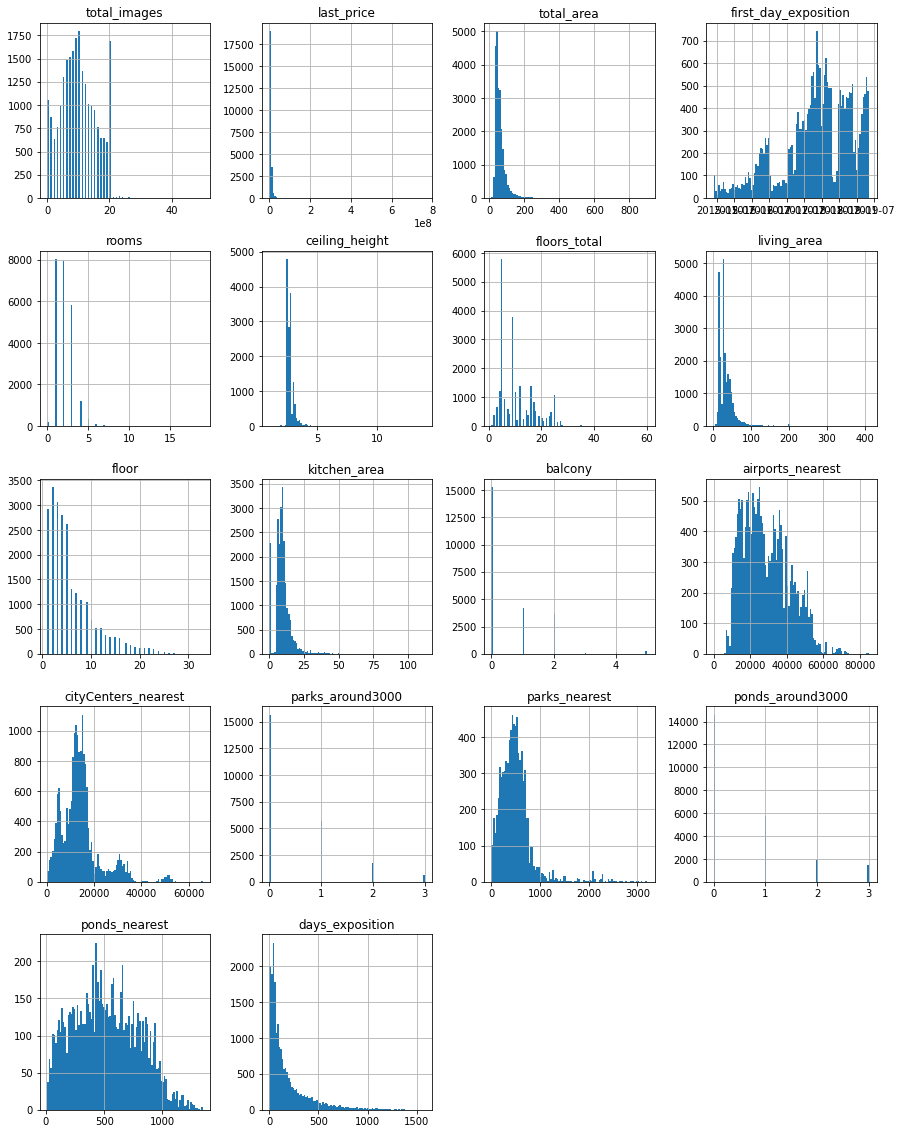

In [28]:
data.hist(figsize=(15, 20), bins=100)

**Вывод**

В ходе предобработки данных были заполнены пропуски различными методами (как одинаковыми значениями, так и при попомщи группировки по категориям). В большинстве столбцов были устранены пропуски либо частично либо полностью. Так в столбцу о жилой площади были заполнены при использовании категоризации данных по количеству комнат.Пропуски в остальных столбцах были заполнены одинаковымы значениями.

Также в ходе предобработки были удалены аномально-высокие значения высот потолков.

А также унифицированы названия населенных пунктов.

Также следует отметить возможные причины появления пропусков в данных: технические причины (при копировании данных были пропущены некоторые значения), также есть некоторые параметры (такие как высота потолков, значения которых люди могли не знать), а также возможны пропуски из-за человеческого фактора: кто-то забыл ответить на вопрос.

### Посчитайте и добавьте в таблицу новые столбцы

In [29]:
data['price_metr'] = data['last_price']/data['total_area'] #расчет цены одного квадратного метра

In [30]:
data['weekday'] = data['first_day_exposition'].dt.weekday #день недели публикации объявления

In [31]:
data['month'] = data['first_day_exposition'].dt.month #месяц публикации объявленияи

In [32]:
data['year'] = data['first_day_exposition'].dt.year #год публикации объявленияи

In [33]:
#функция, разделяющая квартиры по этажам
def categorize_floor (row):
    floor = row['floor']
    last = row['floors_total']
    if floor == last:
        return 'последний'
    if floor == 1:
        return 'первый'
    else:
        return 'другой'

In [34]:
#применение функции, разделяющей квартиры по этажам
data['floor_cat'] = data.apply(categorize_floor, axis=1)

In [35]:
data['center_km'] = round(data['cityCenters_nearest']/1000) #вычисление расстояния до центра в киллометрах

**Вывод** 

Итого в ходе обработки данных были получены новые столбцы: цена одного квадратного метра, день недели, месяц и год выставления на продажу, была проведена категоризация продаваемого жилья по этажам, а также было рассчитано расстояние до центра города в км.

### Проведите исследовательский анализ данных

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

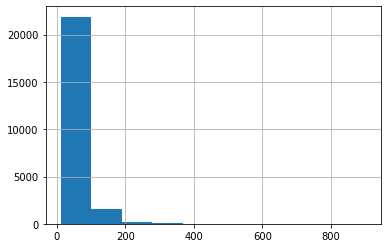

In [36]:
data['total_area'].hist()
data['total_area'].describe()

**Вывод** 

Согласно графику общая площадь жилья в основном изменяется в пределах от 40 до 70 квадратных метров.

count    23699.000000
mean        34.439021
std         22.426140
min          2.000000
25%         19.000000
50%         30.000000
75%         41.300000
max        409.700000
Name: living_area, dtype: float64

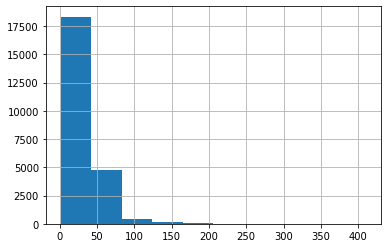

In [37]:
data['living_area'].hist()
data['living_area'].describe()

**Вывод** 

Согласно графику жилая площадь жилья в основном изменяется в пределах от 19 до 41 квадратных метров.

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

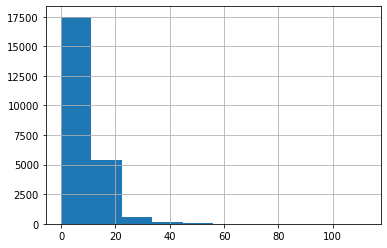

In [38]:
data['kitchen_area'].hist()
data['kitchen_area'].describe()

**Вывод** 

Согласно графику площадь кухни  в жильяе в основном изменяется в пределах от 6 до 11 квадратных метров.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

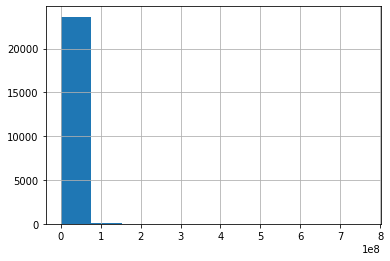

In [39]:
data['last_price'].hist()
data['last_price'].describe()

**Вывод** 

Согласно графику цена на жилье изменяется в широких пределах (существует немного очень дорогих квартир), однако в основном квартиры стоят около 4,65 млн рублей.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

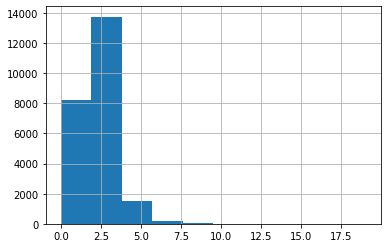

In [40]:
data['rooms'].hist()
data['rooms'].describe()

**Вывод** 

Согласно графику в основном на продажу выставляются квартиры количеством комнат 1-3. Однако есть большие дома до 19 комнат.

count    14504.000000
mean         2.729608
std          0.319850
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

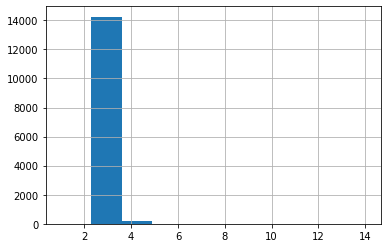

In [41]:
data['ceiling_height'].hist()
data['ceiling_height'].describe()

**Вывод** 

Согласно графику в основном высота потолков составляет 2,5 метра. Однако есть квартиры с высотой потолков до 14 метров, скорее всего это часные дома с высококими потолками в банкетных залах.

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

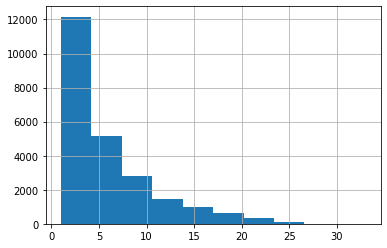

In [42]:
data['floor'].hist()
data['floor'].describe()

**Вывод** 

Согласно графику в основном продают квартиры 4 этажей, что объясняется тем, что Ленинградская область - болотистая местность и домов с большим количеством этажей здесь мало, однако есть и исключения - здания до 33 этажей, скорее всего это новые постройки в больших ЖК.

count      23699
unique         3
top       другой
freq       17363
Name: floor_cat, dtype: object

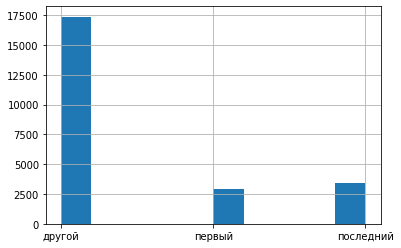

In [43]:
data['floor_cat'].hist()
data['floor_cat'].describe()

**Вывод** 

Согласно графику в основном продают квартиры не на первом и последнем этаже, а на других, что логично, так как других этажей больше по определению.

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

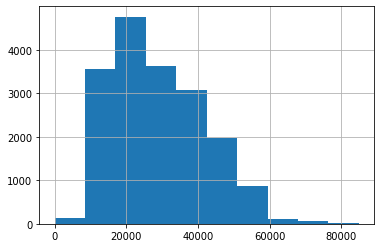

In [44]:
data['airports_nearest'].hist()
data['airports_nearest'].describe()

**Вывод** 

Согласно графику в основном квартиры продают на расстоянии 28 км.Что соответствует квартирам в Санкт-Петербурге.

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

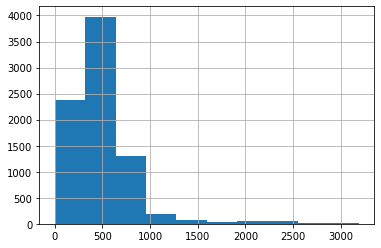

In [45]:
data['parks_nearest'].hist()
data['parks_nearest'].describe()

**Вывод** 

Согласно графику в основном квартиры продают на расстояниии 500 метров от ближайшего парка, что говорит о том. что люди предпочитают жить в зеленом районе.

count    23699.000000
mean         2.569307
std          1.789082
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

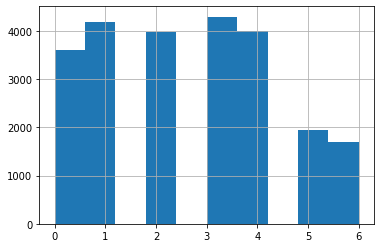

In [46]:
data['weekday'].hist()
data['weekday'].describe()

**Вывод** 

Согласно графику отсутствует распределение проданных квартир по дню недели, продают во все дни примерно одинаково, однако на выходных продаж меньше всего.

count    23699.000000
mean         6.400101
std          3.491561
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

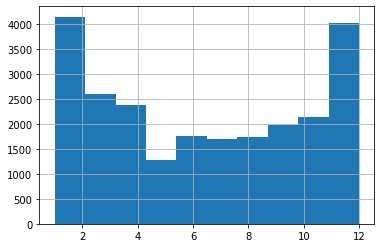

In [47]:
data['month'].hist()
data['month'].describe()

**Вывод** 

Согласно графику больше всего квартир продают в первый и последний месяц года.

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

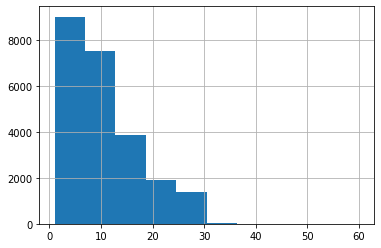

In [48]:
data['floors_total'].hist()
data['floors_total'].describe()

**Вывод**

В основном количество этажей в домах Ленобласти составляет до 5-10 этажей. Однако существуют очень высокие дома в 60 этажей.

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

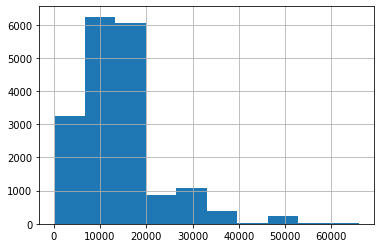

In [49]:
data['cityCenters_nearest'].hist()
data['cityCenters_nearest'].describe()

**Вывод**

В основном расстояние до центра города составляет около 15 км. Также следует отметить, что домов с малым расстоянием до центра (до 5 км) больше, чем домов с высоким значением расстояния до центра (выше 20 км).

17.204405887513403
14.918608051467006


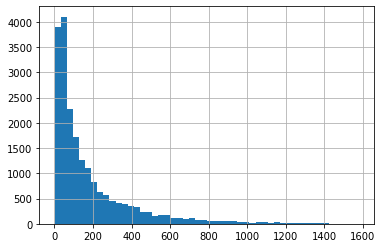

In [50]:
data['days_exposition'].hist(bins=50)
data['days_exposition'].describe()
print(len(data.query('days_exposition < 30'))/len(data.dropna(subset=['days_exposition']))*100)
print(len(data.query('days_exposition > 365'))/len(data.dropna(subset=['days_exposition']))*100)

**Вывод** 

Согласно графику если квартиру не продают в ближайшие 100 дней, то потом продать ее будет проблематичнее. То есть с ростом давности заявки о продаже уменьшается количество проданных квартир. 

Также следует отметить что есть аномально высокие и низкие значения, когда квартира продавалась за один день, но есть и объявления, которые висят по несколько лет.

Быстрыми продажами можно назвать продажи до недели, они составляют 17% от всех имеющихся данных. Долгими продажами можно назвать продажи дольше года, они составляют 15% от всех имеющихся данных. 

<AxesSubplot:title={'center':'Зависимость цены от площади'}, xlabel='total_area'>

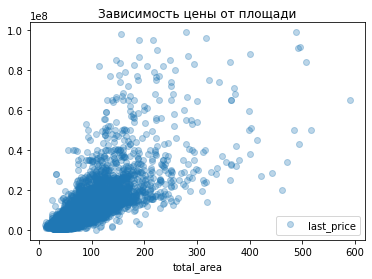

In [51]:
data.query('last_price < 10**8').plot(title="Зависимость цены от площади", x='total_area', y='last_price', style='o', alpha=0.3)

**Вывод** 

Согласно графику есть линейная зависимость цены от площади. Есть аномально высокие значения цены за те же площади, скорее всего, это из-за того, квартира располагается в очень престижном районе. Также для более качественного анализа были отрошены некоторые аномально-высокие значения.

<AxesSubplot:title={'center':'Зависимость цены от площади'}, xlabel='living_area'>

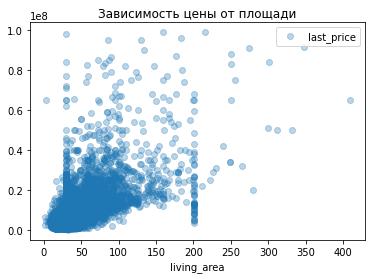

In [52]:
data.query('last_price < 10**8').plot(title="Зависимость цены от площади", x='living_area', y='last_price', style='o', alpha=0.3)

**Вывод** 

Согласно графику есть линейная зависимость цены от площади. Распределение зависимости цены от жилой площади и общей площади является похожим. Есть аномально высокие значения цены за те же площади, скорее всего, это из-за того, квартира располагается в очень престижном районе. Также для более качественного анализа были отрошены некоторые аномально-высокие значения.

<AxesSubplot:title={'center':'Зависимость цены от площади'}, xlabel='kitchen_area'>

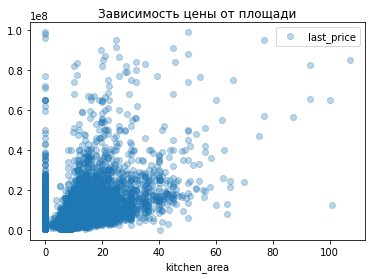

In [53]:
data.query('last_price < 10**8').plot(title="Зависимость цены от площади", x='kitchen_area', y='last_price', style='o', alpha=0.3)

**Вывод** 

Согласно графику есть линейная зависимость цены от площади кухни. Распределение зависимости цены от жилой площади и общей площади является похожим. Есть аномально высокие значения цены за те же площади, скорее всего, это из-за того, квартира располагается в очень престижном районе. Также для более качественного анализа были отрошены некоторые аномально-высокие значения.

Также следует отметить, что пропуски были заполнены 0 с предположением о том, что если в графе пропуск, то кухня отсутствует (то есть объединена с другой площадью, например, она находится в зале). При этом наблюдается явный вырос в районе нуля.

<AxesSubplot:title={'center':'Зависимость цены от комнат'}, xlabel='rooms'>

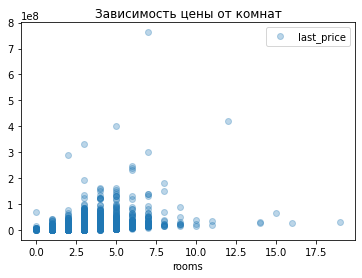

In [54]:
data.plot(title="Зависимость цены от комнат", x='rooms', y='last_price', style='o', alpha=0.3)

**Вывод** 

Согласно графику самые дорогие квартиры с пятью комнатами. То есть до определенного предела с ростом количества комнат растети цена, но затем она убывает.

<AxesSubplot:title={'center':'Зависимость цены от комнат'}, xlabel='floor_cat'>

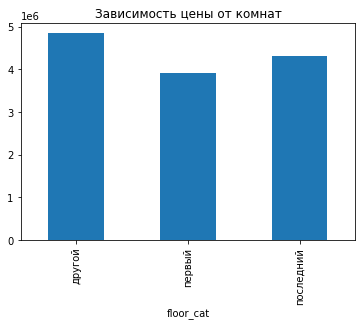

In [55]:
group_data = data.groupby('floor_cat')['last_price'].median()
group_data.plot(title="Зависимость цены от комнат", x='last_price', y='floor_cat', kind='bar')

**Вывод** 

Согласно графику цена квартиры не зависит от этажа, однако, как правило, самые дешевые квартиры находятся на первом этаж.

<AxesSubplot:title={'center':'Зависимость цены от дня недели'}, xlabel='weekday'>

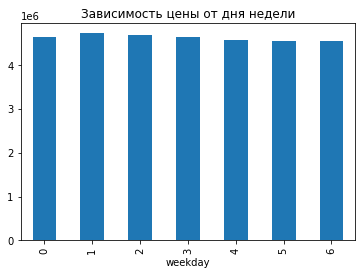

In [56]:
group_data_day = data.groupby('weekday')['last_price'].median()
group_data_day.plot(title="Зависимость цены от дня недели", x='last_price', y='weekday', kind='bar')

**Вывод** 

Согласно графику цена квартиры не сильно зависит от дня недели, в который квартира выставляется на продажу. однако, как правило, по вторникам квартиры продаются дороже.

<AxesSubplot:title={'center':'Зависимость цены от месяца'}, xlabel='month'>

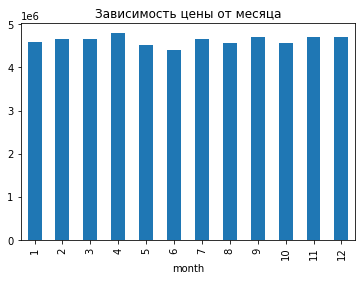

In [57]:
group_data_month = data.groupby('month')['last_price'].median()
group_data_month.plot(title="Зависимость цены от месяца", x='last_price', y='month', kind='bar')

**Вывод** 

Согласно графику цена квартиры не сильно зависит от месяца, в который квартира выставляется на продажу. однако, как правило, в мае квартиры продаются дороже.

**Вывод**

Согласно графику цена квартиры в 2014 году была самой высокой и далее она снижалась, и в 2019 снова стала расти.

In [59]:
#выделение населенных пунктов по количеству объявлений о продаже квартиры в нем
locality_name_count = data.pivot_table(index='locality_name', values='price_metr', aggfunc=['first', 'count'])
locality_name_count.columns = ['price_metr', 'count']
locality_name_count = locality_name_count.sort_values(by='count', ascending=True)

#вычисление средней цены квадратного метрав населенных пунктах
mean_names = data.pivot_table(index='locality_name', values='price_metr', aggfunc='mean')

#объединение созданных таблиц
locality_name_count = locality_name_count.merge(mean_names, on='locality_name').tail(10)
locality_name_count = locality_name_count.rename(columns={'price_metr_y': 'mean_price_metr'})
locality_name_count.drop(columns=locality_name_count.columns[0], axis= 1 , inplace= True)
locality_name_count

,count,mean_price_metr
locality_name,,
Выборг,237,58141.909153
Гатчина,307,68746.146763
Парголово,327,90175.913458
Колпино,338,75424.579098
Пушкин,369,103125.819291
Всеволожск,398,68654.473986
Шушары,440,78677.364217
Кудрово,472,95324.930544
Мурино,590,86087.512050


**Вывод**

Согласно приведенной выше таблице самое дорогое жилье в Санкт-Петербурге, а самое дешевое в Выборге.

<AxesSubplot:title={'center':'Зависимость цены от расстояния до центра'}, xlabel='center_km'>

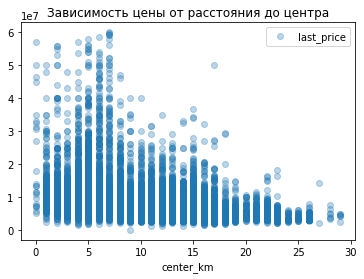

In [60]:
loc_spb = data.query('locality_name == "Санкт-Петербург"')[['center_km', 'last_price']] #отделение квартир в СПб
loc_spb['mean_km_price'] = loc_spb['last_price']/loc_spb['center_km'] #вычисление стоимости квадратного метра квартир в СПб
loc_spb = loc_spb.query('last_price < 0.6*10**8') #удаление аномальо-высоких значений стоимости квартир
loc_spb.plot(title="Зависимость цены от расстояния до центра", x='center_km', y='last_price', style='o', alpha=0.3)

**Вывод**

На графике видно, что с увеличением расстояния до центра стоимость квартиры падает.

### Общий вывод

В ходе работы с данными были выполнены следующие пункты:

1) В ходе предобработки данных были заполнены пропуски различными методами (как одинаковыми значениями, так и при попомщи группировки по категориям). В большинстве столбцов были устранены пропуски либо частично, либо полностью. Так в столбце о  жилой площади были заполнены при использовании категоризации данных по количеству комнат. Пропуски в других столбцах были заполнены одинаковымы значениями. Некоторые пропуски были оставлены, так как возможно, они понадобятся потом для анализа. Также были удалены аномальные значения некоторых параметров и унифицированы названия населенных пунктов;

2) В ходе анализа данных были добавлены новые столбцы для нахождения зависимостей в данных: цена одного квадратного метра; день недели публикации объявления (0 — понедельник, 1 — вторник и так далее); месяц публикации объявления; год публикации объявления; тип этажа квартиры (значения — «первый», «последний», «другой»); расстояние до центра города в километрах (переведите из м в км и округлите до целых значений);

3) Были проанализированы зависимости цены от: общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год); этажей в доме и расстояния до центра. Был сделан вывод о том что площади квартиры явно влияют на стоимость квартиры (зависимость практически линейная), явная зависимость цены квартиры от дня и месяца выставления на продажу отсутствует, также следует отметить, что цены на квартиры, начиная с 2014 года снижаются;

4) Также были найдены самые дорогие районы для проживания в Ленобласти (среди них, например, Санкт-Петербург и Мурино);

5) Также было выявлено, что с увеличением расстояния до центра в городе цена на квартиру падает.


Также следует отметить, что при поиске квартиры, если человек хочет найти квартиру подешевле ему следует дать следующие рекомендации: 

1) Квартира находится на расстоянии более 20 км от центра;

2) Квартира обладает небольшой жилой, общей площадью и площадью кухни;

3) Также квартиру было выгоднее покупать в 2017 году;

4) Квартира должна быть на первом этаже;

5) И в квартире должно быть минимальное количество комнат:).